# Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Import

In [2]:
df_purchase = pd.read_csv("purchase data.csv")

# Data Exploration

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Data Segmentation

## Import Segmentation Model

In [5]:
scaler = pickle.load(open('C:/my files/programming/data science/customer analytics/segmentation/scaler.pickle', 'rb'))

In [6]:
pca = pickle.load(open('C:/my files/programming/data science/customer analytics/segmentation/pca.pickle', 'rb'))

In [7]:
kmeans_pca = pickle.load(open('C:/my files/programming/data science/customer analytics/segmentation/kmeans_pca.pickle', 'rb'))

## Standardization

In [8]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
# transforming the new feature data 
df_purchase_segm_std = scaler.transform(features)

## PCA

In [9]:
# using PCA model from before
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

## Kmeans PCA

In [10]:
purchase_segm_kmean_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [11]:
df_purchase_predictors = df_purchase.copy()

In [12]:
df_purchase_predictors['Segment'] = purchase_segm_kmean_pca

# Descriptive Analysis by Segments

## Data Analysis by Customer

In [13]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,3
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,3
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3


In [14]:
# Counted the total Visit of each customer
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence': "N_Visits"})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [15]:
# Counted no. of time purchases vs no. visits
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence': "N_Purchases"})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [16]:
temp3['Average_N_Purchase'] = temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [17]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_desc = temp3.join(temp4)

In [18]:
df_purchase_desc.head()

,N_Visits,N_Purchases,Average_N_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,3
200000002,87,11,0.126437,1
200000003,97,10,0.103093,3
200000004,85,11,0.129412,3
200000005,111,13,0.117117,2


## Segment Proportion

In [20]:
segm_prop = df_purchase_desc[['N_Purchases', 'Segment']].groupby(['Segment']).count()/df_purchase_desc.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.186
1,0.196
2,0.210
3,0.408


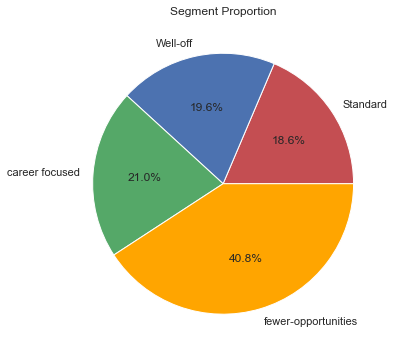

In [21]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
       labels = ['Standard', 'Well-off', 'career focused', 'fewer-opportunities'],
       autopct = '%1.1f%%',
       colors=('r','b','g', 'orange'))
plt.title('Segment Proportion')
plt.show()

## Purchase Occasion and Purchase Incidence

In [22]:
segments_mean = df_purchase_desc.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchase
Segment,,,
0,117.344086,23.741935,0.205859
1,117.295918,34.602041,0.284478
2,124.428571,41.847619,0.294155
3,113.823529,22.769608,0.201598


In [23]:
segments_std = df_purchase_desc.groupby(['Segment']).std()

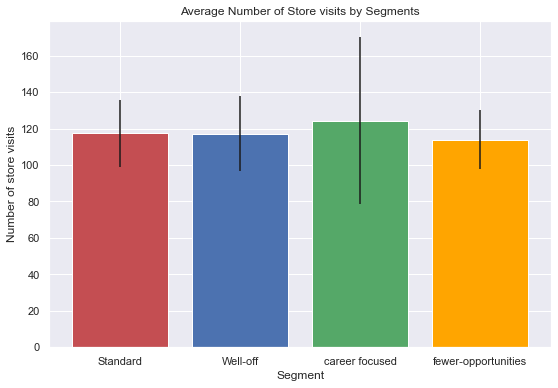

In [24]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
       tick_label=('Standard', 'Well-off', 'career focused', 'fewer-opportunities'),
        height = segments_mean['N_Visits'],
       color=('r','b','g', 'orange'),
       yerr = segments_std['N_Visits'])

plt.xlabel('Segment')
plt.ylabel('Number of store visits')
plt.title('Average Number of Store visits by Segments')
plt.show()

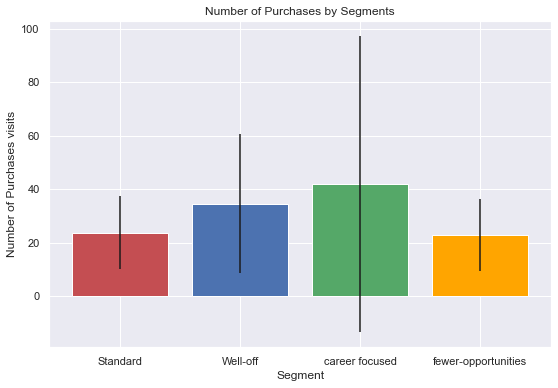

In [25]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
       tick_label=('Standard', 'Well-off', 'career focused', 'fewer-opportunities'),
        height = segments_mean['N_Purchases'],
       color=('r','b','g', 'orange'),
       yerr = segments_std['N_Purchases'])

plt.xlabel('Segment')
plt.ylabel('Number of Purchases visits')
plt.title('Number of Purchases by Segments')
plt.show()

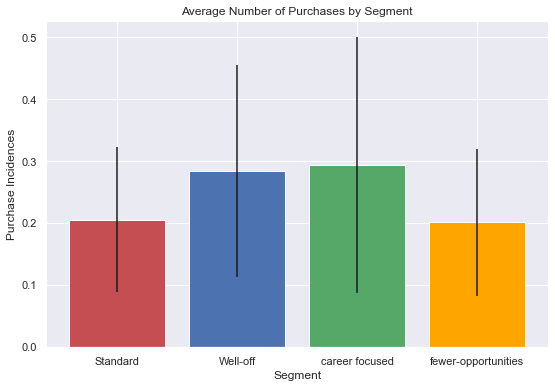

In [27]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
       tick_label=('Standard', 'Well-off', 'career focused', 'fewer-opportunities'),
        height = segments_mean['Average_N_Purchase'],
       color=('r','b','g', 'orange'),
       yerr = segments_std['Average_N_Purchase'])

plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')
plt.show()

## Brand Choice

In [28]:
# if people bought something
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [40]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies.head(10)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,3,200000001
11,0,0,0,0,1,3,200000001
19,1,0,0,0,0,3,200000001
24,0,0,0,1,0,3,200000001
29,0,1,0,0,0,3,200000001
52,0,0,0,1,0,3,200000001
79,0,1,0,0,0,3,200000001
80,0,1,0,0,0,3,200000001
97,0,0,0,0,1,3,200000001
101,0,0,0,1,0,1,200000002


In [41]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()

In [42]:
mean_brand_сhoice = temp.groupby(['Segment'], as_index=True).mean()

In [43]:
mean_brand_сhoice.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.264758,0.391117,0.173307,0.054725,0.116092
1,0.041928,0.117422,0.030610,0.613623,0.196417
2,0.068499,0.102112,0.041006,0.112350,0.676033
3,0.137614,0.679597,0.019834,0.064880,0.098075


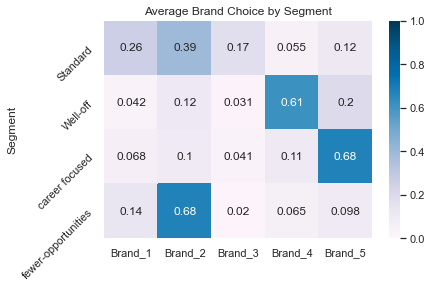

In [58]:
h = sns.heatmap(mean_brand_сhoice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot=True)
h.set_yticklabels(['Standard', 'Well-off', 'career focused', 'fewer-opportunities'],rotation = 45)
plt.title("Average Brand Choice by Segment")
plt.show()

## Revenue

In [76]:
df_purchase_predictors.head()
pd.options.mode.chained_assignment = None

In [77]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_revenue_brand = pd.DataFrame()
segments_revenue_brand[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index= False).sum()
segments_revenue_brand

,Segment,Revenue Brand 1
0,0,2510.63
1,1,699.47
2,2,664.94
3,3,2430.61


In [79]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_revenue_brand[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index= False).sum()
segments_revenue_brand

,Segment,Revenue Brand 1,Revenue Brand 2
0,0,2510.63,4093.37
1,1,699.47,1298.23
2,2,664.94,1144.38
3,3,2430.61,15232.33


In [80]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_revenue_brand[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index= False).sum()
segments_revenue_brand

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,2510.63,4093.37,3909.17
1,1,699.47,1298.23,731.35
2,2,664.94,1144.38,650.32
3,3,2430.61,15232.33,730.68


In [81]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_revenue_brand[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index= False).sum()
segments_revenue_brand

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,2510.63,4093.37,3909.17,613.06
1,1,699.47,1298.23,731.35,14185.57
2,2,664.94,1144.38,650.32,2301.70
3,3,2430.61,15232.33,730.68,1939.77


In [82]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_revenue_brand[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index= False).sum()
segments_revenue_brand

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2510.63,4093.37,3909.17,613.06,1476.67
1,1,699.47,1298.23,731.35,14185.57,5509.69
2,2,664.94,1144.38,650.32,2301.70,20251.43
3,3,2430.61,15232.33,730.68,1939.77,2383.21


In [83]:
segments_revenue_brand['Total Revenue'] = (segments_revenue_brand['Revenue Brand 1'] +
                                           segments_revenue_brand['Revenue Brand 2'] +
                                           segments_revenue_brand['Revenue Brand 3'] +
                                           segments_revenue_brand['Revenue Brand 4'] +
                                           segments_revenue_brand['Revenue Brand 5'])
segments_revenue_brand

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2510.63,4093.37,3909.17,613.06,1476.67,12602.90
1,1,699.47,1298.23,731.35,14185.57,5509.69,22424.31
2,2,664.94,1144.38,650.32,2301.70,20251.43,25012.77
3,3,2430.61,15232.33,730.68,1939.77,2383.21,22716.60


In [89]:
segments_revenue_brand['Segment Proportions'] = segm_prop['Segment Proportions']
segments_revenue_brand['Segment'] = segments_revenue_brand['Segment'].map({0: 'Standard', 
                                                                           1: 'Well-off', 
                                                                           2: 'career focused', 
                                                                           3: 'fewer-opportunities'})
segments_revenue_brand = segments_revenue_brand.set_index('Segment')
segments_revenue_brand.drop('Segment Proportions', axis=1)

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportion
Segment,,,,,,,
Standard,2510.63,4093.37,3909.17,613.06,1476.67,12602.90,0.186
Well-off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
career focused,664.94,1144.38,650.32,2301.70,20251.43,25012.77,0.210
fewer-opportunities,2430.61,15232.33,730.68,1939.77,2383.21,22716.60,0.408
